# Incremental Learning 1: Two-Step Incremental Learning

1. Train model (M1) on the complete dataset (D1).
2. Split the complete dataset (D1) into the base dataset (D2) and the update dataset (D3).
3. Train a new model (M2) on D2 and update it using D3.
4. Compare M1 and M2
    1. Evaluation M1 and M2 on the complete dataset D1.
    2. TODO: Compare feature importance vectors for individual data points from M1 and M2 (should be very similar)


In [3]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error

from incremental_learning.job import train, update, evaluate
from incremental_learning.config import datasets_dir, root_dir

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Train model (M1) on the complete dataset (D1)

In [4]:
dataset_name = 'ccpp'
D1 = pd.read_csv(datasets_dir / '{}.csv'.format(dataset_name))
D1.drop_duplicates(inplace=True)

## sample 1000 rows just for test purposes!
D1 = D1.sample(100)

job1 = train(dataset_name, D1)

session: job_rlmxf	command:
/home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmpt0v611zj --config /tmp/tmpe42b8gqp --output /tmp/tmpz2l08re5 --validElasticLicenseKeyConfirmed true --persist /tmp/tmpym326qeg; if [ $? -eq 0 ]; then echo "Success"; else echo "Failure";  fi;


In [5]:
job1.wait_to_complete()

stderr,output
"/home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmpt0v611zj --config /tmp/tmpe42b8gqp --output /tmp/tmpz2l08re5 --validElasticLicenseKeyConfirmed true --persist /tmp/tmpym326qeg; if [ $? -eq 0 ]; then echo ""Success""; else echo ""Failure""; fi (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks/incremental_learning [papermill-notebooks ↑·4|⚑ 6] 10:29 $ /home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmpt0v611zj --config /tmp/tmpe42b8gqp --output /tmp/tmpz2l08re5 --validElasticLicenseKeyConfirmed true --persist /tmp/tmpym326qeg; if [ $? -eq 0 ]; then echo ""Success""; else echo ""Failure""; fi 2021-08-05 08:29:51,519037 UTC [15045] DEBUG Main.cc@152 data_frame_analyzer (64 bit): Version 8.0.0-SNAPSHOT (Build 67af1fd3e641e1) Copyright (c) 2021 Elasticsearch BV 2021-08-05 08:29:51,519086 UTC [15045] DEBUG CProcessPriority_Linux.cc@38 Successfully increased OOM killer adjustment via /proc/self/oom_score_adj 2021-08-05 08:29:51,519097 UTC [15045] DEBUG CSystemCallFilter_Linux.cc@133 Seccomp BPF filters available 2021-08-05 08:29:51,519988 UTC [15045] DEBUG CSystemCallFilter_Linux.cc@159 Seccomp BPF installed 2021-08-05 08:29:51,520389 UTC [15045] DEBUG CDataFrameAnalyzer.cc@107 Received 100 rows 2021-08-05 08:29:52,260237 UTC [15045] INFO CBoostedTreeImpl.cc@282 Exiting hyperparameter optimisation loop on round 7 out of 18. 2021-08-05 08:29:52,546133 UTC [15045] INFO Main.cc@260 [{""name"":""E_DFTPMEstimatedPeakMemoryUsage"",""description"":""The upfront estimate of the peak memory training the predictive model would use"",""value"":6032180} ,{""name"":""E_DFTPMPeakMemoryUsage"",""description"":""The peak memory training the predictive model used"",""value"":694605} ,{""name"":""E_DFTPMTimeToTrain"",""description"":""The time it took to train the predictive model"",""value"":744} ,{""name"":""E_DFTPMTrainedForestNumberTrees"",""description"":""The total number of trees in the trained forest"",""value"":7} ] 2021-08-05 08:29:52,546172 UTC [15045] DEBUG Main.cc@265 ML data frame analyzer exiting Success (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks/incremental_learning [papermill-notebooks ↑·4|⚑ 6] 10:29 $",",{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":452.1033325195312 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":432.6473083496094 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":475.3347778320312 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":436.7301025390625 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":452.6974487304687 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":481.3638305664062 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":444.8078918457031 ,{""model_metadata"":{""total_feature_importance"":[],""hyperparameters"":[{""name"":""do ,{""compressed_data_summarization"":{""doc_num"":0,""data_summarization"":""H4sIAAAAAAA ]"


Job succeeded


True

## 2. Split the complete dataset (D1) into the base dataset (D2) and the update dataset (D3).

In [6]:
D2, D3 = train_test_split(D1, test_size=0.2)

## 3. Train a new model (M2) on D2 and update it using D3.

In [7]:
job2 = train(dataset_name, D2)

session: job_wlibq	command:
/home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmp9ydwe38m --config /tmp/tmpzxrm7axw --output /tmp/tmp81adgtu6 --validElasticLicenseKeyConfirmed true --persist /tmp/tmprqh1z_jz; if [ $? -eq 0 ]; then echo "Success"; else echo "Failure";  fi;


In [8]:
job2.wait_to_complete()

stderr,output
"/home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmp9ydwe38m --config /tmp/tmpzxrm7axw --output /tmp/tmp81adgtu6 --validElasticLicenseKeyConfirmed true --persist /tmp/tmprqh1z_jz; if [ $? -eq 0 ]; then echo ""Success""; else echo ""Failure""; fi (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks/incremental_learning [papermill-notebooks ↑·4|⚑ 6] 10:29 $ /home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmp9ydwe38m --config /tmp/tmpzxrm7axw --output /tmp/tmp81adgtu6 --validElasticLicenseKeyConfirmed true --persist /tmp/tmprqh1z_jz; if [ $? -eq 0 ]; then echo ""Success""; else echo ""Failure""; fi 2021-08-05 08:29:56,784319 UTC [16384] DEBUG Main.cc@152 data_frame_analyzer (64 bit): Version 8.0.0-SNAPSHOT (Build 67af1fd3e641e1) Copyright (c) 2021 Elasticsearch BV 2021-08-05 08:29:56,784369 UTC [16384] DEBUG CProcessPriority_Linux.cc@38 Successfully increased OOM killer adjustment via /proc/self/oom_score_adj 2021-08-05 08:29:56,784380 UTC [16384] DEBUG CSystemCallFilter_Linux.cc@133 Seccomp BPF filters available 2021-08-05 08:29:56,784718 UTC [16384] DEBUG CSystemCallFilter_Linux.cc@159 Seccomp BPF installed 2021-08-05 08:29:56,785031 UTC [16384] DEBUG CDataFrameAnalyzer.cc@107 Received 80 rows 2021-08-05 08:29:57,405196 UTC [16384] INFO CBoostedTreeImpl.cc@282 Exiting hyperparameter optimisation loop on round 7 out of 18. 2021-08-05 08:29:57,815313 UTC [16384] INFO Main.cc@260 [{""name"":""E_DFTPMEstimatedPeakMemoryUsage"",""description"":""The upfront estimate of the peak memory training the predictive model would use"",""value"":5432918} ,{""name"":""E_DFTPMPeakMemoryUsage"",""description"":""The peak memory training the predictive model used"",""value"":469381} ,{""name"":""E_DFTPMTimeToTrain"",""description"":""The time it took to train the predictive model"",""value"":628} ,{""name"":""E_DFTPMTrainedForestNumberTrees"",""description"":""The total number of trees in the trained forest"",""value"":15} ] 2021-08-05 08:29:57,815426 UTC [16384] DEBUG Main.cc@265 ML data frame analyzer exiting Success (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks/incremental_learning [papermill-notebooks ↑·4|⚑ 6] 10:29 $",",{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":435.9287719726562 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":449.6653442382812 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":462.8325500488281 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":435.9287719726562 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":477.7511291503906 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":479.3641662597656 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":436.4898681640625 ,{""model_metadata"":{""total_feature_importance"":[],""hyperparameters"":[{""name"":""do ,{""compressed_data_summarization"":{""doc_num"":0,""data_summarization"":""H4sIAAAAAAA ]"


Job succeeded


True

In [9]:
job3 = update(dataset_name, D3, job2)
job3.wait_to_complete()

stderr,output
"/home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmpbp8mh898 --config /tmp/tmptcuaa3x4 --output /tmp/tmpiwshzwj9 --validElasticLicenseKeyConfirmed true --restore /tmp/tmpbeokz2al; if [ $? -eq 0 ]; then echo ""Success""; else echo ""Failure""; fi (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks/incremental_learning [papermill-notebooks ↑·4|⚑ 6] 10:30 $ /home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmpbp8mh898 --config /tmp/tmptcuaa3x4 --output /tmp/tmpiwshzwj9 --validElasticLicenseKeyConfirmed true --restore /tmp/tmpbeokz2al; if [ $? -eq 0 ]; then echo ""Success""; else echo ""Failure""; fi 2021-08-05 08:30:02,251207 UTC [17802] DEBUG Main.cc@152 data_frame_analyzer (64 bit): Version 8.0.0-SNAPSHOT (Build 67af1fd3e641e1) Copyright (c) 2021 Elasticsearch BV 2021-08-05 08:30:02,251259 UTC [17802] DEBUG CProcessPriority_Linux.cc@38 Successfully increased OOM killer adjustment via /proc/self/oom_score_adj 2021-08-05 08:30:02,251270 UTC [17802] DEBUG CSystemCallFilter_Linux.cc@133 Seccomp BPF filters available 2021-08-05 08:30:02,251599 UTC [17802] DEBUG CSystemCallFilter_Linux.cc@159 Seccomp BPF installed 2021-08-05 08:30:02,252435 UTC [17802] DEBUG CDataFrameAnalyzer.cc@107 Received 28 rows 2021-08-05 08:30:02,256352 UTC [17802] INFO CBoostedTreeImpl.cc@436 Exiting hyperparameter optimisation loop early 2021-08-05 08:30:02,260720 UTC [17802] INFO Main.cc@260 [{""name"":""E_DFTPMEstimatedPeakMemoryUsage"",""description"":""The upfront estimate of the peak memory training the predictive model would use"",""value"":1470831} ,{""name"":""E_DFTPMPeakMemoryUsage"",""description"":""The peak memory training the predictive model used"",""value"":130952} ,{""name"":""E_DFTPMTimeToTrain"",""description"":""The time it took to train the predictive model"",""value"":4} ] 2021-08-05 08:30:02,260751 UTC [17802] DEBUG Main.cc@265 ML data frame analyzer exiting Success (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks/incremental_learning [papermill-notebooks ↑·4|⚑ 6] 10:30 $",",{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":476.3063049316406 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":441.1804504394531 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":477.9193115234375 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":463.8323669433594 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":451.1941223144531 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":459.60986328125,"" ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":440.1463317871094 ,{""model_metadata"":{""total_feature_importance"":[],""hyperparameters"":[{""name"":""do ,{""compressed_data_summarization"":{""doc_num"":0,""data_summarization"":""H4sIAAAAAAA ]"


Job succeeded


True

## 4. A. Compare M1 and M2 on D1

In [10]:
y_true = D1[job1.dependent_variable]
y_M1 = job1.get_predictions()
eval_job = evaluate(dataset_name, D1, job2)
success = eval_job.wait_to_complete()
if not success:
    print('Evaluation failed')
y_M2 = eval_job.get_predictions()

stderr,output
"/home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmpnby45qwf --config /tmp/tmp5lk68rhi --output /tmp/tmpv8i8slj2 --validElasticLicenseKeyConfirmed true --restore /tmp/tmp_5h0rq8a; if [ $? -eq 0 ]; then echo ""Success""; else echo ""Failure""; fi (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks/incremental_learning [papermill-notebooks ↑·4|⚑ 6] 10:30 $ /home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmpnby45qwf --config /tmp/tmp5lk68rhi --output /tmp/tmpv8i8slj2 --validElasticLicenseKeyConfirmed true --restore /tmp/tmp_5h0rq8a; if [ $? -eq 0 ]; then echo ""Success""; else echo ""Failure""; fi 2021-08-05 08:30:07,310770 UTC [19130] DEBUG Main.cc@152 data_frame_analyzer (64 bit): Version 8.0.0-SNAPSHOT (Build 67af1fd3e641e1) Copyright (c) 2021 Elasticsearch BV 2021-08-05 08:30:07,310822 UTC [19130] DEBUG CProcessPriority_Linux.cc@38 Successfully increased OOM killer adjustment via /proc/self/oom_score_adj 2021-08-05 08:30:07,310833 UTC [19130] DEBUG CSystemCallFilter_Linux.cc@133 Seccomp BPF filters available 2021-08-05 08:30:07,311356 UTC [19130] DEBUG CSystemCallFilter_Linux.cc@159 Seccomp BPF installed 2021-08-05 08:30:07,312932 UTC [19130] DEBUG CDataFrameAnalyzer.cc@107 Received 108 rows 2021-08-05 08:30:07,315396 UTC [19130] INFO Main.cc@260 [{""name"":""E_DFTPMEstimatedPeakMemoryUsage"",""description"":""The upfront estimate of the peak memory training the predictive model would use"",""value"":6271885} ,{""name"":""E_DFTPMPeakMemoryUsage"",""description"":""The peak memory training the predictive model used"",""value"":16554} ] 2021-08-05 08:30:07,315428 UTC [19130] DEBUG Main.cc@265 ML data frame analyzer exiting Success (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks/incremental_learning [papermill-notebooks ↑·4|⚑ 6] 10:30 $",",{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":452.1653137207031 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":435.9287719726562 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":474.80615234375,"" ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":435.9287719726562 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":449.5102233886719 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":479.3641662597656 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":447.0312805175781 ,{""model_metadata"":{""total_feature_importance"":[],""hyperparameters"":[],""train_pr ,{""compressed_data_summarization"":{""doc_num"":0,""data_summarization"":""H4sIAAAAAAA ]"


Job succeeded


In [11]:
def compute_metrics(ytrue, m1pred, m2pred):
    m1_mae = mean_absolute_error(ytrue, m1pred)
    m1_mse = mean_squared_error(ytrue, m1pred)
    m2_mae = mean_absolute_error(ytrue, m2pred)
    m2_mse = mean_squared_error(ytrue, m2pred)
    print("M1: MAE: {}\tMSE:{}".format(m1_mae, m1_mse))
    print("M2: MAE: {}\tMSE:{}".format(m2_mae, m2_mse))
    ax = sns.scatterplot(x=m1pred, y=m2pred)
    plt.xlabel('M1 predictions')
    plt.ylabel('M2 predictions')

M1: MAE: 3.061122180175782	MSE:14.611641946625271
M2: MAE: 3.1028326171875	MSE:14.385638341379842


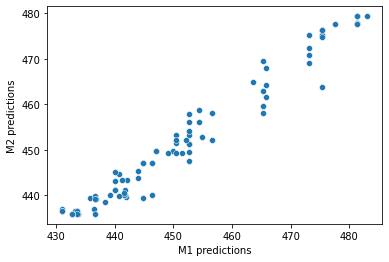

In [12]:
compute_metrics(y_true, y_M1, y_M2)